In [40]:
# Data managment
import pickle
import pandas as pd
import numpy as np
# Linear regression
import statsmodels.api as sm
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
# QQ plot
from scipy.stats import norm, probplot
import pylab

# Getting the Data

In [41]:
data = pd.read_pickle("cluj_prices_lm.pkl")

In [42]:
data.head()

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,not finished,0.17,Intre Lacuri,2024,other
1,168675,3,67.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
2,177825,3,69.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
3,168675,3,67.0,2,2,False,not finished,0.17,Gheorgheni,2024,other
4,133725,2,53.0,1,0,True,not finished,0.17,Intre Lacuri,2024,other


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_euro     161 non-null    int64  
 1   rooms          161 non-null    int64  
 2   size           161 non-null    float64
 3   bathrooms      161 non-null    int64  
 4   terrace        161 non-null    int64  
 5   pass_through   161 non-null    bool   
 6   finished       161 non-null    object 
 7   height_pos     161 non-null    float64
 8   neighbourhood  161 non-null    object 
 9   year_built     161 non-null    int32  
 10  zone           161 non-null    object 
dtypes: bool(1), float64(2), int32(1), int64(4), object(3)
memory usage: 13.4+ KB


# Exploratory Data Analysis

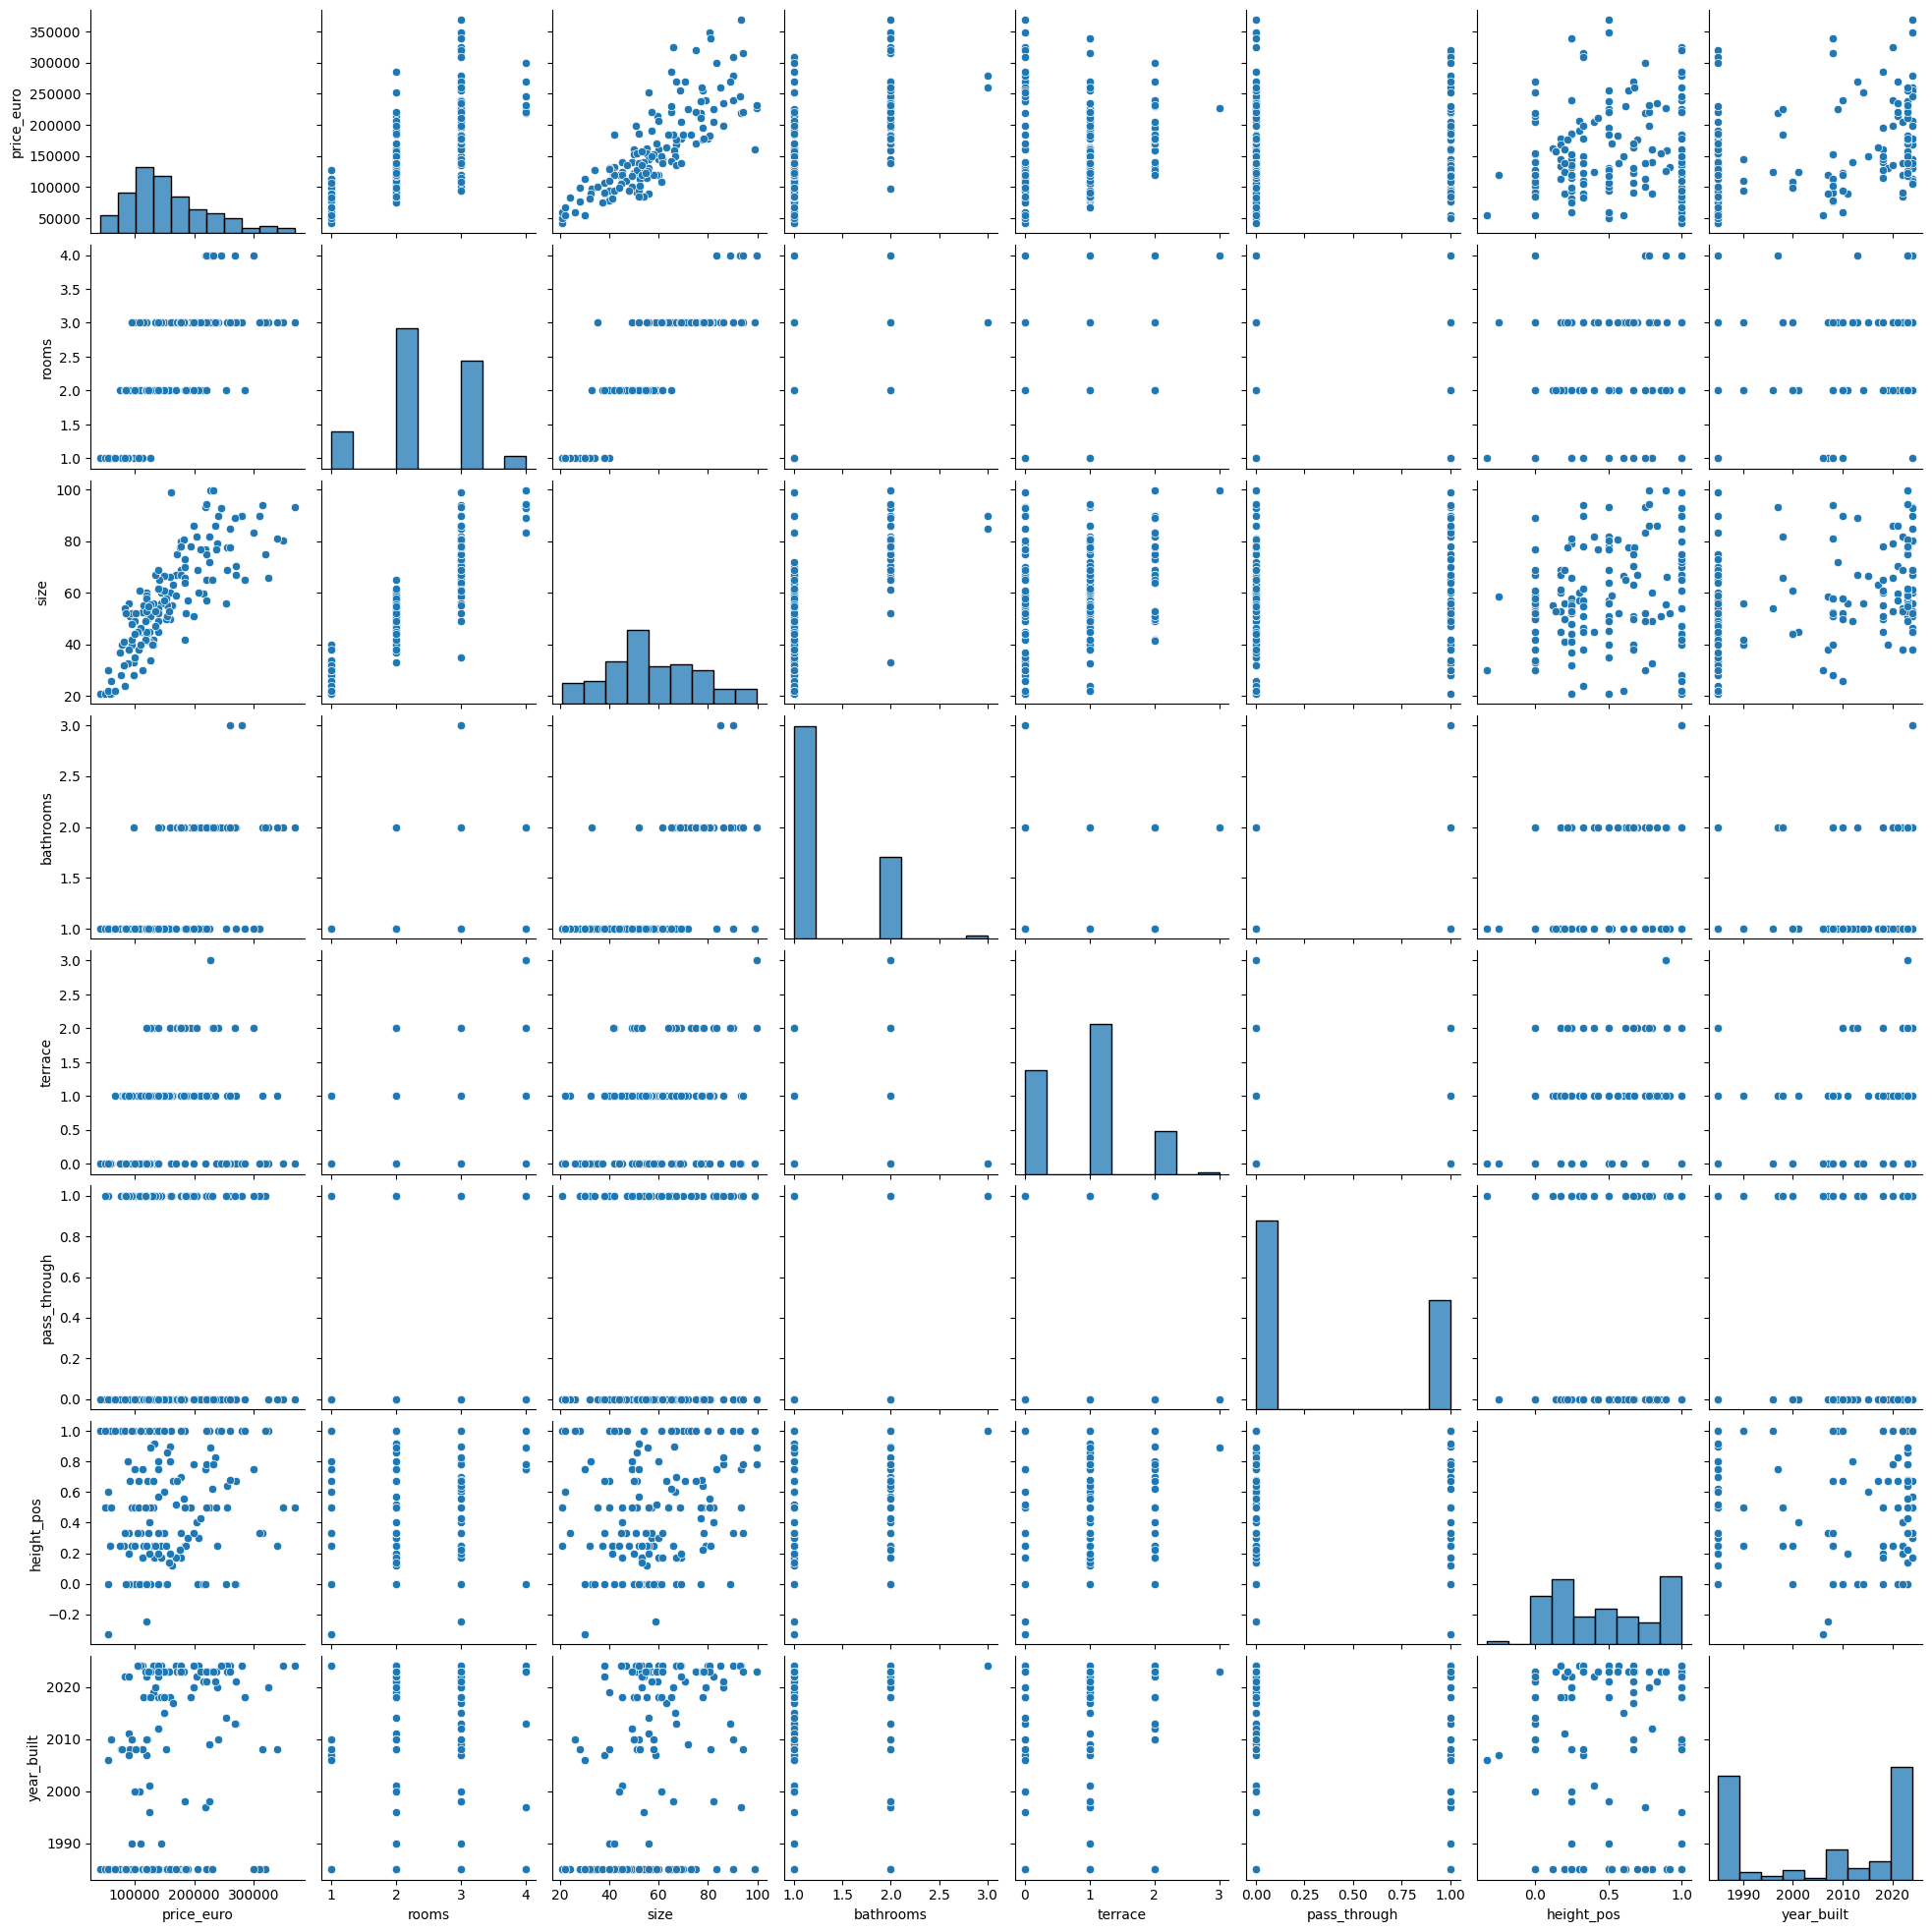

In [44]:
sns.pairplot(data)

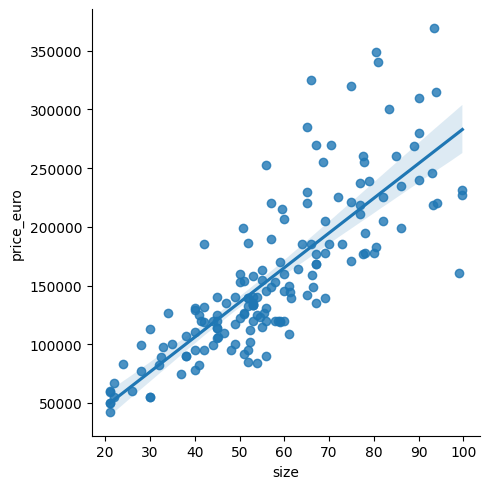

In [45]:
sns.lmplot(data, x='size', y='price_euro')

# Training the Model

In [59]:
X = data[['size', 'year_built', 'bathrooms']]
X['size'] = (X['size'] - np.mean(X['size'])) / np.std(X['size'])
X['year_built'] = (X['year_built'] - np.mean(X['year_built'])) / np.std(X['year_built'])
X['bathrooms'] = (X['bathrooms'] - np.mean(X['bathrooms'])) / np.std(X['bathrooms'])
X = sm.add_constant(X)
model = sm.OLS(data['price_euro'], X)
lm = model.fit()

C:\Users\Mariam Aghamalyan\AppData\Local\Temp\ipykernel_30232\1486206722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['size'] = (X['size'] - np.mean(X['size'])) / np.std(X['size'])
C:\Users\Mariam Aghamalyan\AppData\Local\Temp\ipykernel_30232\1486206722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year_built'] = (X['year_built'] - np.mean(X['year_built'])) / np.std(X['year_built'])
C:\Users\Mariam Aghamalyan\AppData\Local\Temp\ipykernel_30232\1486206722.py:4: SettingWithCopyWarning: 
A va

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_euro   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           7.23e-38
Time:                        04:02:48   Log-Likelihood:                -1929.2
No. Observations:                 161   AIC:                             3866.
Df Residuals:                     157   BIC:                             3879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.576e+05   3088.162     51.029      0.000    1.51e+05    1.64e+05
size        4.843e+04   4340.608     11.157      0.000    3.99e+04     5.7e+04
year_built -2975.2763   3379.324     -0.880      0.380   -9650.081    3699.528
bathrooms   1.116e+04   4217.136      2.646      0.009    2827.082    1.95e+04
==============================================================================
Omnibus:                       32.942   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.622
Skew:                           1.087   Prob(JB):                     1.68e-11
Kurtosis:                       4.635   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation of the Model

In [60]:
price_pred = lm.predict(X)
residuals = (data['price_euro']-price_pred)

In [65]:
print(len(data['price_euro']), len(price_pred))

146 146


In [66]:
mae = mean_absolute_error(data['price_euro'], price_pred)

In [67]:
mse = mean_squared_error(data['price_euro'], price_pred)

In [68]:
rmse = math.sqrt(mse)

In [69]:
print(mae)
print(rmse)

19681.318318677102
24778.052285001428


# Residual Analysis

In [70]:
# neg_out = set(residuals[residuals < -70000].index)
pos_out = set(residuals[residuals > 60000].index)

keep_rows = list(set(data.index) - pos_out)
len(keep_rows)

data = data.loc[keep_rows]
len(data)

143

<function matplotlib.pyplot.show(close=None, block=None)>

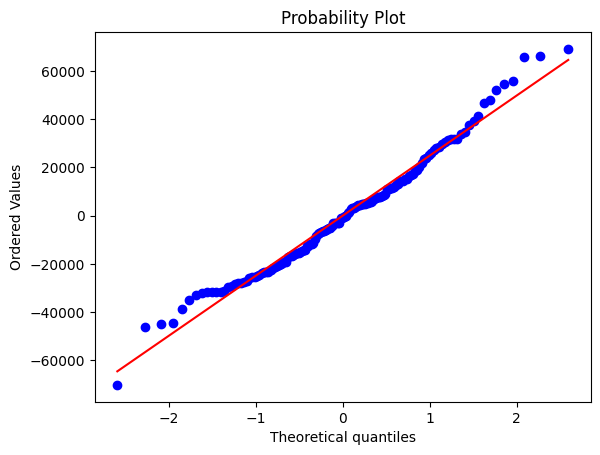

In [71]:
qq = probplot(residuals, dist="norm", plot=pylab)
plt.show

<Axes: xlabel='price_euro', ylabel='pred_price'>

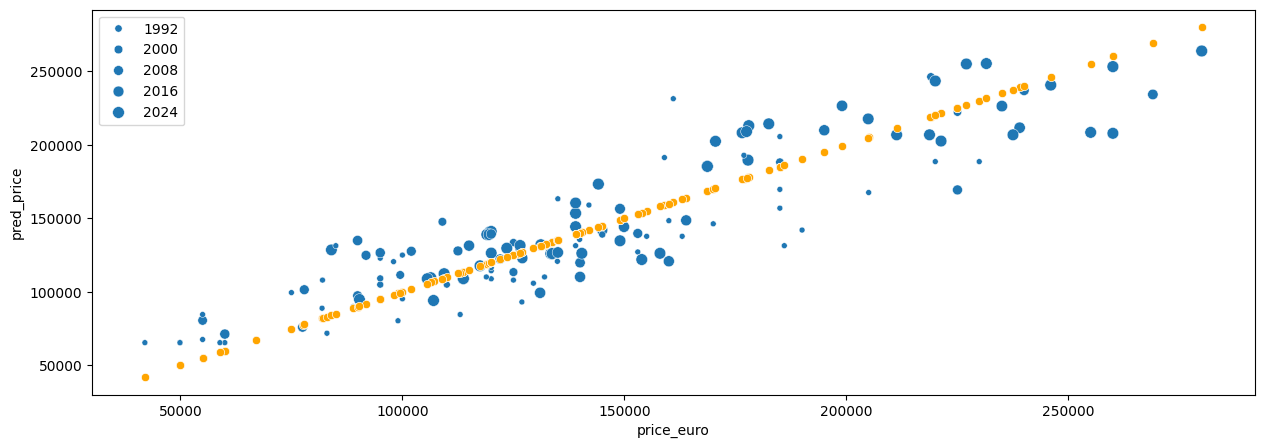

In [72]:
data['pred_price'] = price_pred

fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(data=data, x='price_euro', y='pred_price', ax=ax, size='year_built')
sns.scatterplot(data=data, x='price_euro', y='price_euro', ax=ax, color='orange')

# Conclusion

While the model is statistically significant and explains a substantial portion of the price variation, the lack of significance for year_built and the potential issues with residual normality point to areas where further model improvement could be explored. For instance, addressing multicollinearity, trying additional features, or considering other machine learning methods may improve the predictive accuracy of the model. Nonetheless, this regression model provides a solid foundation for predicting apartment prices based on size, age, and the number of bathrooms.